## Exploratory Data Analysis of Motor Vehicle Collisions/Crashes in New York City

In [31]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import datetime as date
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
import scipy.stats as stats


### Data loading into a Data Frame

In [32]:
collision_df = pd.read_csv('data/Motor_Vehicle_Collisions_Crashes.csv', low_memory=False)
collision_df.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


### Data cleansing and preparation

In [33]:
# Converting column names to lower case for easy use

collision_df.columns = collision_df.columns.str.lower()
collision_df.head()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,off street name,...,contributing factor vehicle 2,contributing factor vehicle 3,contributing factor vehicle 4,contributing factor vehicle 5,collision_id,vehicle type code 1,vehicle type code 2,vehicle type code 3,vehicle type code 4,vehicle type code 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [34]:
# Details of the data frame columns

collision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055148 entries, 0 to 2055147
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   crash date                     object 
 1   crash time                     object 
 2   borough                        object 
 3   zip code                       object 
 4   latitude                       float64
 5   longitude                      float64
 6   location                       object 
 7   on street name                 object 
 8   cross street name              object 
 9   off street name                object 
 10  number of persons injured      float64
 11  number of persons killed       float64
 12  number of pedestrians injured  int64  
 13  number of pedestrians killed   int64  
 14  number of cyclist injured      int64  
 15  number of cyclist killed       int64  
 16  number of motorist injured     int64  
 17  number of motorist killed      int64  
 18  co

In [35]:
# Check if there are duplicate records

collision_df_duplicate_rows = collision_df.duplicated().sum()
collision_df_duplicate_rows

0

In [36]:
# To see the number of null value records for each column
collision_df.isnull().sum()

crash date                             0
crash time                             0
borough                           639335
zip code                          639583
latitude                          232395
longitude                         232395
location                          232395
on street name                    434972
cross street name                 774094
off street name                  1712549
number of persons injured             18
number of persons killed              31
number of pedestrians injured          0
number of pedestrians killed           0
number of cyclist injured              0
number of cyclist killed               0
number of motorist injured             0
number of motorist killed              0
contributing factor vehicle 1       6643
contributing factor vehicle 2     316686
contributing factor vehicle 3    1908723
contributing factor vehicle 4    2022174
contributing factor vehicle 5    2046227
collision_id                           0
vehicle type cod

In [37]:
# Convert date format and create year, month and day columns for later use

collision_df['crash date'] = pd.to_datetime(collision_df['crash date'])

collision_df['year'] = collision_df['crash date'].dt.year
collision_df['month'] = collision_df['crash date'].dt.month
collision_df['day'] = collision_df['crash date'].dt.day

In [38]:
# Check the data frame now with new columns and data types

collision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055148 entries, 0 to 2055147
Data columns (total 32 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   crash date                     datetime64[ns]
 1   crash time                     object        
 2   borough                        object        
 3   zip code                       object        
 4   latitude                       float64       
 5   longitude                      float64       
 6   location                       object        
 7   on street name                 object        
 8   cross street name              object        
 9   off street name                object        
 10  number of persons injured      float64       
 11  number of persons killed       float64       
 12  number of pedestrians injured  int64         
 13  number of pedestrians killed   int64         
 14  number of cyclist injured      int64         
 15  number of cycli

### Data Exploration

### Collisions by Boroughs in NYC

In [39]:
# Collisions by borough

borough_df = collision_df.groupby('borough').count()['collision_id'].reset_index(name='Number of collisions').sort_values(by='Number of collisions',ascending=False)
borough_df

,borough,Number of collisions
1,BROOKLYN,449881
3,QUEENS,379446
2,MANHATTAN,317903
0,BRONX,209176
4,STATEN ISLAND,59407


[Text(0, 0, '449881'),
 Text(0, 0, '379446'),
 Text(0, 0, '317903'),
 Text(0, 0, '209176'),
 Text(0, 0, '59407')]

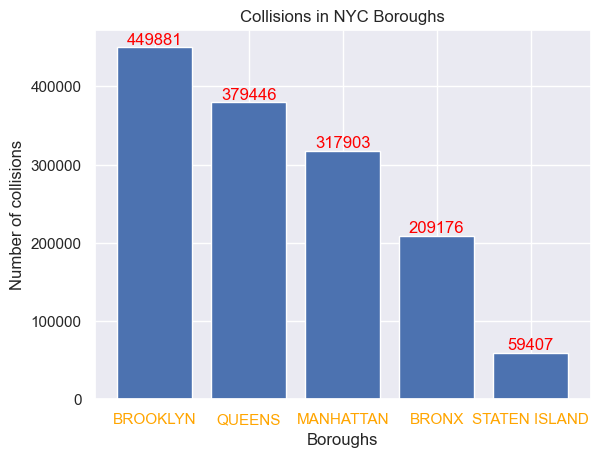

In [40]:
# Plot the bar chart to visually compare the number of collisions in New York boroughs

#plt.bar(borough_df['borough'],borough_df['Number of collisions'])
#plt.xlabel('Boroughs')
#plt.ylabel('Number of collisions')
#plt.title('Collisions in NYC Boroughs')
#plt.show()

fig, ax = plt.subplots()
ax.set_xlabel('Boroughs')
ax.set_ylabel('Number of collisions')
ax.set_title('Collisions in NYC Boroughs')
x_pos = np.arange(len(borough_df['borough']))
ax.set_xticks(x_pos, borough_df['borough'], color='orange')
bars = ax.bar(borough_df['borough'],borough_df['Number of collisions'])
ax.bar_label(bars, color = 'red')



#### Most of the companies and primary attractions are located in Brooklyn, Queens and Manhattan that contributes to higher traffic resulting in increased accidents.

### Collisions by Years

In [41]:
# Collisions by year
year_df = collision_df.groupby('year').count()['collision_id'].reset_index(name='Count').sort_values(by='Count',ascending=False)
year_df

,year,Count
6,2018,231564
5,2017,231007
4,2016,229831
3,2015,217694
7,2019,211486
2,2014,206033
1,2013,203742
8,2020,112916
9,2021,110548
10,2022,103882


[Text(0, 0, '231564'),
 Text(0, 0, '231007'),
 Text(0, 0, '229831'),
 Text(0, 0, '217694'),
 Text(0, 0, '211486'),
 Text(0, 0, '206033'),
 Text(0, 0, '203742'),
 Text(0, 0, '112916'),
 Text(0, 0, '110548'),
 Text(0, 0, '103882'),
 Text(0, 0, '100545'),
 Text(0, 0, '95900')]

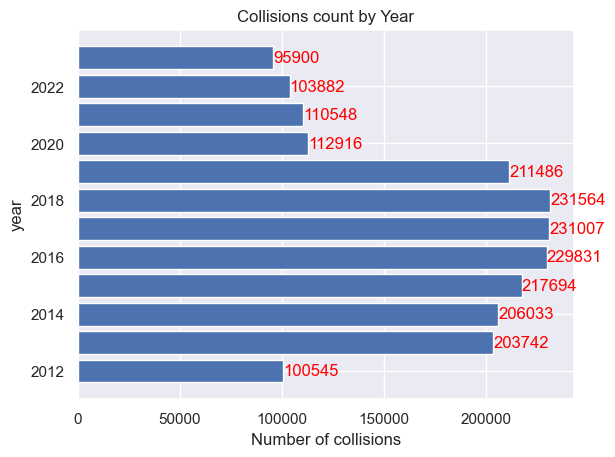

In [42]:
# Plot the bar chart for collosions by the year


fig, ax = plt.subplots()
ax.set_xlabel('Number of collisions')
ax.set_ylabel('year')
ax.set_title('Collisions count by Year')
bars = ax.barh(year_df['year'],year_df['Count'])
ax.bar_label(bars, color = 'red')

#### The collisions have considerably reduced in recent years from 2020. One of the primary reasons could be due to Covid, when people started working remote. Also, the traffic safety initiatives by the police deparment seem to have helped to control the accidents.

### Collisions by the months

In [43]:
# Collisions by month
month_df = collision_df.groupby('month').count()['collision_id'].reset_index(name='Count').sort_values(by='Count',ascending=False)
month_df

,month,Count
9,10,188566
6,7,184889
8,9,182404
7,8,182303
11,12,178823
10,11,178529
5,6,173757
4,5,172570
2,3,161840
0,1,156557


[Text(0, 0, '231564'),
 Text(0, 0, '231007'),
 Text(0, 0, '229831'),
 Text(0, 0, '217694'),
 Text(0, 0, '211486'),
 Text(0, 0, '206033'),
 Text(0, 0, '203742'),
 Text(0, 0, '112916'),
 Text(0, 0, '110548'),
 Text(0, 0, '103882'),
 Text(0, 0, '100545'),
 Text(0, 0, '95900')]

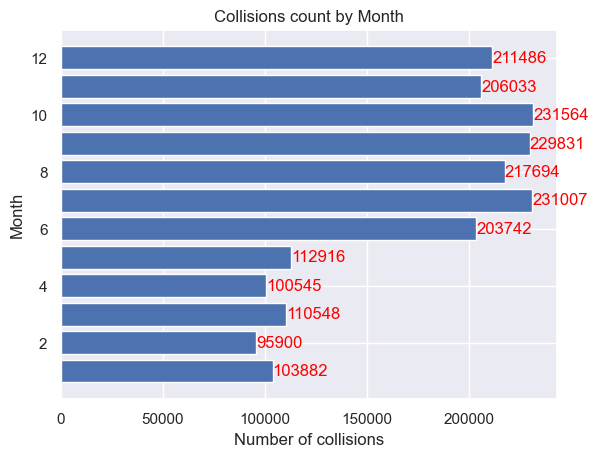

In [59]:
# plt.bar(month_df['month'],month_df['Count'])
# plt.xlabel('Month')
# plt.ylabel('Number of collisions')
# plt.title('Collisions count by Month')

# plt.show()



fig, ax = plt.subplots()
ax.set_xlabel('Number of collisions')
ax.set_ylabel('Month')
ax.set_title('Collisions count by Month')
bars = ax.barh(month_df['month'],year_df['Count'])
ax.bar_label(bars, color = 'red')

#### During warmer months, the incident rate is relatively higher compared to months during spring and winter season. However, the difference is not significant. This could be due to different factors such as sport or festive events happening at different times of the year.

#### To determine the collisions by the time of the day

In [45]:
# To determine the collissions by the time of the day 

def map_time_to_bin(time):
    for i, bin_range in enumerate(bins):
        start_hour, end_hour = bin_range.split('-')
        start_hour, end_hour = int(start_hour.split(':')[0]), int(end_hour.split(':')[0])
        time_hour = int(time.split(':')[0])
        if start_hour <= time_hour < end_hour:
            return labels[i]
    return None
labels = ['EarlyMorning','Morning','Afternoon','Night']
bins = ['00:00-06:00', '06:00-12:00', '12:00-18:00', '18:00-23:59']
# Bin the 'Time' column

collision_df['TimeBin'] = collision_df['crash time'].apply(map_time_to_bin)
collision_df.head()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,off street name,...,collision_id,vehicle type code 1,vehicle type code 2,vehicle type code 3,vehicle type code 4,vehicle type code 5,year,month,day,TimeBin
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,4455765,Sedan,Sedan,NaN,NaN,NaN,2021,9,11,EarlyMorning
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,4513547,Sedan,NaN,NaN,NaN,NaN,2022,3,26,Morning
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,2022,6,29,Morning
3,2021-09-11,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,4456314,Sedan,NaN,NaN,NaN,NaN,2021,9,11,Morning
4,2021-12-14,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,4486609,NaN,NaN,NaN,NaN,NaN,2021,12,14,Morning


[Text(0, 0, '790335'),
 Text(0, 0, '538097'),
 Text(0, 0, '460943'),
 Text(0, 0, '209070')]

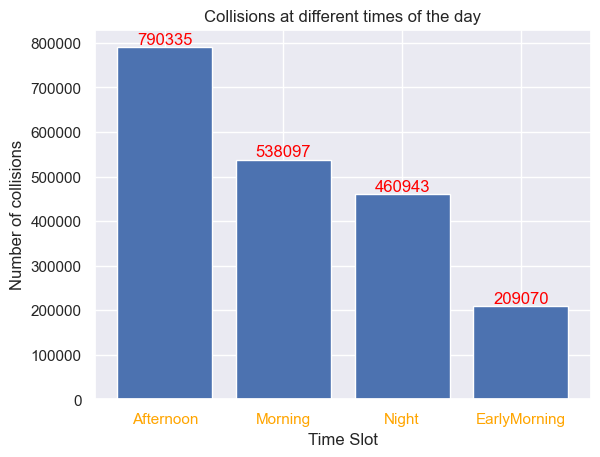

In [57]:
# plot the Collisions by Time of the day

time_df = collision_df.groupby('TimeBin').count()['collision_id'].reset_index(name='Number of collisions').sort_values(by='Number of collisions',ascending=False)
time_df

# Plot the bar chart to visually compare the number of collisions in New York boroughs

fig, ax = plt.subplots()
ax.set_xlabel('Time Slot')
ax.set_ylabel('Number of collisions')
ax.set_title('Collisions at different times of the day')
x_pos = np.arange(len(time_df['TimeBin']))
ax.set_xticks(x_pos, time_df['TimeBin'], color='orange')
bars = ax.bar(time_df['TimeBin'],time_df['Number of collisions'])
ax.bar_label(bars, color = 'red')

The above graph suggests that majority of accidents occur in the afternoon followed by morning and then the night. This makes sense, as the traffic movements are more during the day compared to night and early morning. 



### Injuries vs Fatalities

[Text(0, 0, '631668'),
 Text(0, 0, '115135'),
 Text(0, 0, '54852'),
 Text(0, 0, '454472')]

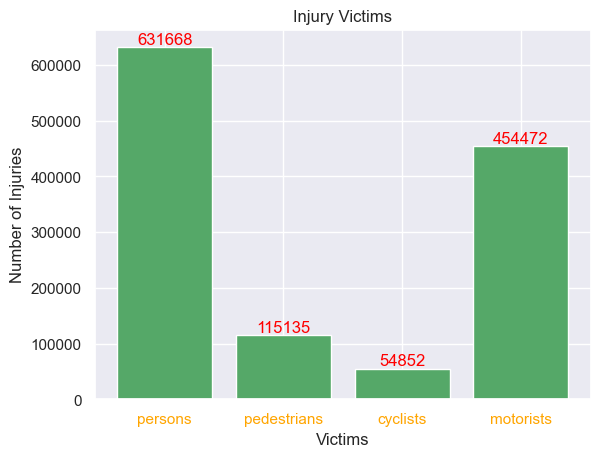

In [47]:
# To compare the injuries and fatalities from the collisions on different types of victims

victims = ['persons','pedestrians','cyclists','motorists']

injuries = [collision_df['number of persons injured'].sum(),collision_df['number of pedestrians injured'].sum(),collision_df['number of cyclist injured'].sum(),collision_df['number of motorist injured'].sum()]
fatalities = [collision_df['number of persons killed'].sum(),collision_df['number of pedestrians killed'].sum(),collision_df['number of cyclist killed'].sum(),collision_df['number of motorist killed'].sum()]


fig, ax = plt.subplots()
ax.set_xlabel('Victims')
ax.set_ylabel('Number of Injuries')
ax.set_title('Injury Victims')
x_pos = np.arange(len(victims))
ax.set_xticks(x_pos, victims, color='orange')
bars = ax.bar(victims, injuries, color='g')
ax.bar_label(bars, color = 'red')


[Text(0, 0, '3034'), Text(0, 0, '1509'), Text(0, 0, '232'), Text(0, 0, '1246')]

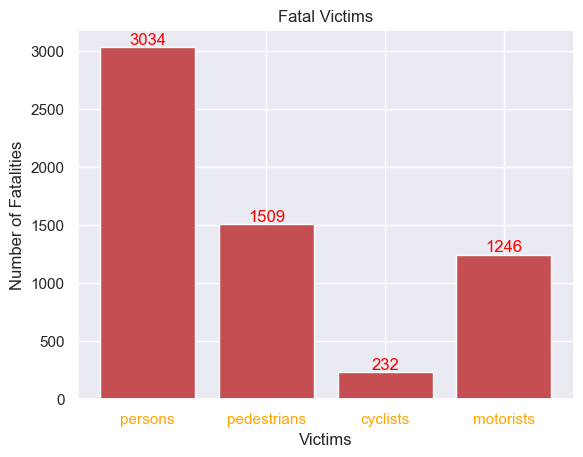

In [58]:
#Fatalities - Bar Chart

fig, ax = plt.subplots()
ax.set_xlabel('Victims')
ax.set_ylabel('Number of Fatalities')
ax.set_title('Fatal Victims')
x_pos = np.arange(len(victims))
ax.set_xticks(x_pos, victims, color='orange')
bars = ax.bar(victims, fatalities, color='r')
ax.bar_label(bars, color = 'red')


#### The fatalities are significantly lower compared to the injuries. But yet it is very critical for the police department to monitor the fatalities in order to eliminate them as per their traffic safety initiative, Vizion Zero. So, let's see how they are trending over these years

#### Fatalities Trends

      number of persons killed  number of pedestrians killed  \
year                                                           
2012                     137.0                            72   
2013                     297.0                           176   
2014                     262.0                           133   
2015                     243.0                           133   
2016                     246.0                           149   
2017                     256.0                           127   
2018                     231.0                           123   
2019                     244.0                           131   
2020                     269.0                           101   
2021                     296.0                           131   
2022                     288.0                           133   
2023                     265.0                           100   

      number of cyclist killed  number of motorist killed  
year                                       

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

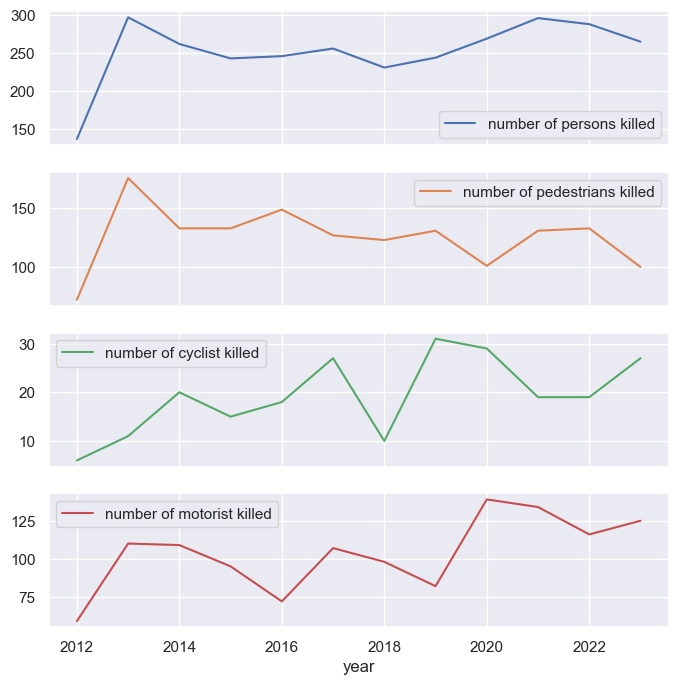

In [49]:
# Fatalities trends for all victim types in one plot


fatalities_trends_df = collision_df.groupby('year').aggregate({'number of persons killed':'sum','number of pedestrians killed':'sum','number of cyclist killed':'sum','number of motorist killed':'sum'})
print(fatalities_trends_df)

fatalities_trends_df.plot(subplots=True, figsize=(8, 8))

#### Per the above plot, the fatalities for persons and pedestrians are dominating but in decreasing trend, while for motorists and cyclists the numbers are lower but in increasing trend. 

### Hypothesis test to verify the independence between various times of the day and the contributing factors of accidents

##### To derive the fatalatiles occured at a particular time of the day.

[Text(0, 0, '1396'),
 Text(0, 0, '1616'),
 Text(0, 0, '1144'),
 Text(0, 0, '1534')]

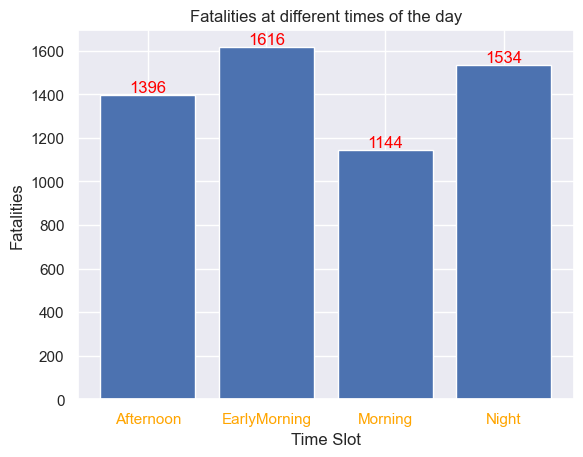

In [50]:
# Calculating fatalities at different times of the day
time_df1 = collision_df.groupby('TimeBin').agg(per_fat=('number of persons killed','sum'), per_cyc= ('number of cyclist killed','sum'),per_mot =('number of motorist killed','sum') ,per_ped= ('number of pedestrians killed','sum')).reset_index()

time_df1['tot_fat'] = time_df1['per_fat'] + time_df1['per_cyc'] + time_df1['per_mot'] + time_df1['per_ped']

fig, ax = plt.subplots()
ax.set_xlabel('Time Slot')
ax.set_ylabel('Fatalities')
ax.set_title('Fatalities at different times of the day')
x_pos = np.arange(len(time_df1['TimeBin']))
ax.set_xticks(x_pos, time_df1['TimeBin'], color='orange')
bars = ax.bar(time_df1['TimeBin'],time_df1['tot_fat'])
ax.bar_label(bars, color = 'red')

In [51]:
#To find critical_value

#The degree of freedom from the dataset = columns -1 * rows -1 = 60 *3 = 180

critical_value = stats.chi2.ppf(q = 0.95, df = 180)
critical_value

212.3039127469521

In [52]:
# Chi-Square Test of Independence

# Create contingency table
cont = pd.crosstab( collision_df['contributing factor vehicle 1'],collision_df['TimeBin'])

# Calculate Chi-square value and P-value
chi2_stat,p_value_chi2,_,_ = chi2_contingency(cont)
print(f'Chi-Square Test of Independence:')
print(f'Chi2 Statistic: {chi2_stat}')
print(f'P-Value: {p_value_chi2}')

Chi-Square Test of Independence:
Chi2 Statistic: 68138.02738471015
P-Value: 0.0


#### Conclusion of the test
Since the chi-square value of 68138.027 at a confidence level of 95% exceeds the critical value of 212.30, the results are statistically significant. A Chi-Square Test of Independence with a very large chi-square statistic and a p-value of 0.0 indicates a highly significant association between the contributing factor and the time it occured.


### Major factors for accidents

In [53]:
# Top 5 Contributing Factors for the accidents

factors = collision_df.groupby('contributing factor vehicle 1').count()['collision_id'].reset_index(name='Count').sort_values(by='Count', ascending=False)
factors.head(5)

,contributing factor vehicle 1,Count
56,Unspecified,701808
11,Driver Inattention/Distraction,410410
18,Failure to Yield Right-of-Way,121779
21,Following Too Closely,109700
6,Backing Unsafely,76095


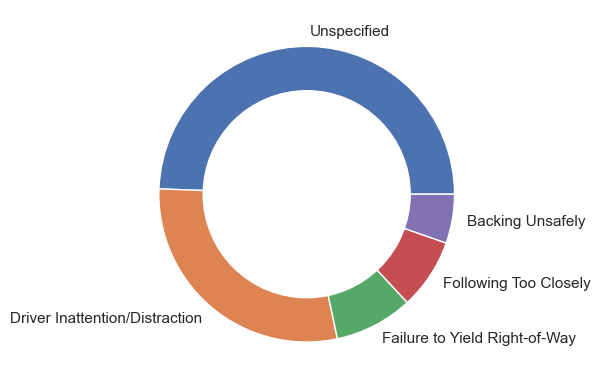

In [54]:
# Get the top 5 contributing factors
top5_factors_df = factors.head(5)

# Plot the donut chart
plt.pie(top5_factors_df['Count'], labels=top5_factors_df['contributing factor vehicle 1'])
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

#### Except the unspecified factor on top of the list, the other prominent factors for accidents are driver inattention, failure to yield, following too closely are few among top contenders.

### Major vehicle types causing accidents

In [55]:
# Top 5 Vehicle types for the accidents

vehicles = collision_df.groupby('vehicle type code 1').count()['collision_id'].reset_index(name='Count').sort_values(by='Count', ascending=False)
vehicles.head(5)

,vehicle type code 1,Count
1005,Sedan,567323
1026,Station Wagon/Sport Utility Vehicle,446414
797,PASSENGER VEHICLE,416206
966,SPORT UTILITY / STATION WAGON,180291
1096,Taxi,50973


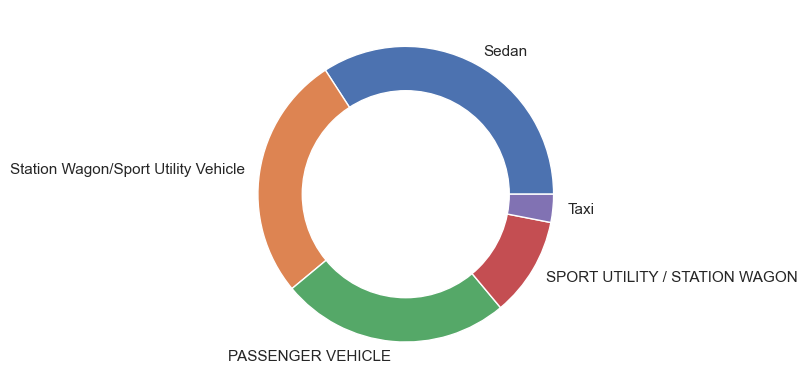

In [56]:
top5_vehicle_df = vehicles.head(5)


#Plot the donut chart for the top 5 vehicle types causing the majority of accidents
plt.pie(top5_vehicle_df['Count'], labels=top5_vehicle_df['vehicle type code 1'])
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

#### Sedans, SUVs, passenger cars are dominating vehicle types to cause accidents.